In [1]:
import pandas as pd
import numpy as np

In [2]:
train=pd.read_csv(r"C:\Users\Tokey\Desktop\Titanic Competition\train.csv")
test=pd.read_csv(r"C:\Users\Tokey\Desktop\Titanic Competition\test.csv")
gender_submission=pd.read_csv(r"C:\Users\Tokey\Desktop\Titanic Competition\gender_submission.csv")


In [3]:
test=test.merge(gender_submission,left_on='PassengerId',right_on='PassengerId')

# Data Preprocessing

In [4]:
# ticket duplication
Ticket_counts_train=pd.DataFrame(train['Ticket'].value_counts())
ticket_dup_yes=[]
ticket_dup_num=[]
i=0
while i<len(train):
    if (Ticket_counts_train.loc[train.iloc[i,8]]>1).bool():
        ticket_dup_yes.append(1)
        ticket_dup_num.append(Ticket_counts_train.loc[train.iloc[i,8]][0])
    else:
        ticket_dup_yes.append(0)
        ticket_dup_num.append(1)
    i=i+1
ticket_dup_num=[x-1 for x in ticket_dup_num]
ticket_dup=pd.concat([pd.DataFrame(ticket_dup_yes,columns=['ticket_dup_yes']),pd.DataFrame(ticket_dup_num,columns=['ticket_dup_num'])],axis=1)
train=pd.concat([train,ticket_dup],axis=1)

In [5]:
# cabin

In [6]:
# whether they have cabin
train['Cabin']=train['Cabin'].fillna(0)
train.loc[train['Cabin']!=0,'Cabin_yes']=1
train.loc[train['Cabin']==0,'Cabin_yes']=0

In [7]:
# how many cabin they have
train[['Cabin1','Cabin2','Cabin3','Cabin4']] = train['Cabin'].str.split(' ',expand=True)

In [8]:
train_Cabin_Num=train[['Cabin1','Cabin2','Cabin3','Cabin4']]
train_Cabin_Num=train_Cabin_Num.fillna(0)
train_Cabin_Num[train_Cabin_Num != 0] = 1 
train_Cabin_Num['Cabin_Num']=train_Cabin_Num['Cabin1']+train_Cabin_Num['Cabin2']+train_Cabin_Num['Cabin3']+train_Cabin_Num['Cabin4']

In [9]:
train=train.drop(['Cabin1','Cabin2','Cabin3','Cabin4'],axis=1)

In [10]:
train=pd.concat([train,train_Cabin_Num['Cabin_Num']],axis=1)

In [11]:
# convert from object to numeric data type
train['Cabin_Num']=train['Cabin_Num'].astype(int)

In [12]:
train_copy=train.copy()

In [13]:
# drop missing age
train=train.dropna(subset=['Age'],axis=0)

In [14]:
train=train[['PassengerId','Survived','Pclass', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare','Embarked', 'ticket_dup_yes',
       'ticket_dup_num', 'Cabin_yes', 'Cabin_Num']]

In [15]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,ticket_dup_yes,ticket_dup_num,Cabin_yes,Cabin_Num
count,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000
mean,448.582633,0.406162,2.236695,29.699118,0.512605,0.431373,34.694514,0.413165,0.817927,0.259104,0.305322
std,259.119524,0.491460,0.838250,14.526497,0.929783,0.853289,52.918930,0.492747,1.327416,0.438450,0.581915
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,222.250000,0.000000,1.000000,20.125000,0.000000,0.000000,8.050000,0.000000,0.000000,0.000000,0.000000
50%,445.000000,0.000000,2.000000,28.000000,0.000000,0.000000,15.741700,0.000000,0.000000,0.000000,0.000000
75%,677.750000,1.000000,3.000000,38.000000,1.000000,1.000000,33.375000,1.000000,1.000000,1.000000,1.000000
max,891.000000,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200,1.000000,6.000000,1.000000,4.000000


In [16]:
# round age
train['Age']=train['Age'].round()

In [17]:
train=train.reset_index()

In [18]:
train=train.drop('index',axis=1)

In [19]:
# get an copy before further processing
train2=train.copy()

In [20]:
#quantify the category variables and get dummy variables
train.loc[train['Sex']=='male','Sex']=1
train.loc[train['Sex']=='female','Sex']=0
train['Pclass']=train['Pclass'].astype(object)
train=pd.get_dummies(train)

In [21]:
train.head(5)

,PassengerId,Survived,Sex,Age,SibSp,Parch,Fare,ticket_dup_yes,ticket_dup_num,Cabin_yes,Cabin_Num,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,1,0,1,22.0,1,0,7.2500,0,0,0.0,0,0,0,1,0,0,1
1,2,1,0,38.0,1,0,71.2833,0,0,1.0,1,1,0,0,1,0,0
2,3,1,0,26.0,0,0,7.9250,0,0,0.0,0,0,0,1,0,0,1
3,4,1,0,35.0,1,0,53.1000,1,1,1.0,1,1,0,0,0,0,1
4,5,0,1,35.0,0,0,8.0500,0,0,0.0,0,0,0,1,0,0,1


# EDA

## Outlier Checking

In [119]:
# to remove outlier
print(train.describe())

       PassengerId    Survived         Sex         Age       SibSp  \
count   714.000000  714.000000  714.000000  714.000000  714.000000   
mean    448.582633    0.406162    0.634454   29.693277    0.512605   
std     259.119524    0.491460    0.481921   14.524527    0.929783   
min       1.000000    0.000000    0.000000    0.000000    0.000000   
25%     222.250000    0.000000    0.000000   20.000000    0.000000   
50%     445.000000    0.000000    1.000000   28.000000    0.000000   
75%     677.750000    1.000000    1.000000   38.000000    1.000000   
max     891.000000    1.000000    1.000000   80.000000    5.000000   

            Parch        Fare  ticket_dup_yes  ticket_dup_num   Cabin_yes  \
count  714.000000  714.000000      714.000000      714.000000  714.000000   
mean     0.431373   34.694514        0.413165        0.817927    0.259104   
std      0.853289   52.918930        0.492747        1.327416    0.438450   
min      0.000000    0.000000        0.000000        0.000000

In [23]:
from matplotlib import pyplot as plt
import seaborn as sns

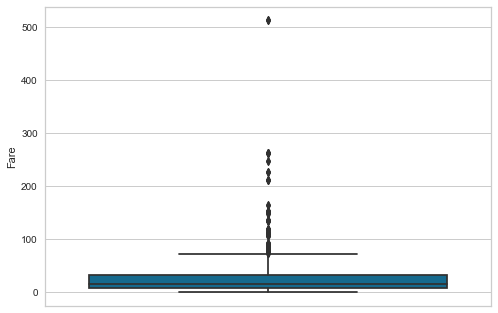

In [65]:
# from 1-dimensional data, Fare seems the only variable that may have outlier
sns.boxplot(y="Fare", data=train)
# some Fare seems too high, may be outlier

In [25]:
# some outlier cannot be detect through 1-dimensional data. I decided to use cook's distance to detect the influential observation

In [47]:
train.columns

Index(['PassengerId', 'Survived', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'ticket_dup_yes', 'ticket_dup_num', 'Cabin_yes', 'Cabin_Num',
       'Pclass_1', 'Pclass_2', 'Pclass_3', 'Embarked_C', 'Embarked_Q',
       'Embarked_S'],
      dtype='object')

E:\Anaconda3\lib\site-packages\yellowbrick\regressor\influence.py:183: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  self.distance_, linefmt=self.linefmt, markerfmt=self.markerfmt


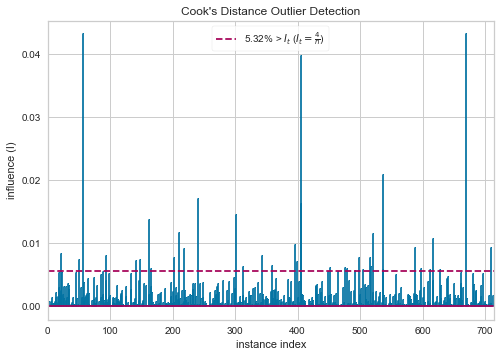

In [49]:
from yellowbrick.regressor import CooksDistance
visualizer = CooksDistance()
cook_dis=visualizer.fit(train[[ 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'ticket_dup_yes', 'ticket_dup_num', 'Cabin_yes', 'Cabin_Num',
       'Pclass_1', 'Pclass_2', 'Pclass_3', 'Embarked_C', 'Embarked_Q',
       'Embarked_S']], train['Survived'])
visualizer.show()

In [50]:
cook_dis.influence_threshold_

0.0056022408963585435

In [51]:
cook_dis.distance_[cook_dis.distance_.ge(cook_dis.influence_threshold_)].sort_values(ascending=False)

57     0.043181
669    0.043181
405    0.039783
537    0.020838
240    0.017009
406    0.016183
301    0.014531
163    0.013694
210    0.011675
521    0.011504
616    0.010648
396    0.009706
709    0.009325
587    0.009199
218    0.009058
22     0.008305
343    0.008017
93     0.007918
516    0.007607
498    0.007607
202    0.007603
148    0.007316
51     0.007300
142    0.007249
399    0.007063
359    0.006398
312    0.006298
518    0.006173
476    0.006144
451    0.006073
598    0.005976
479    0.005926
165    0.005844
628    0.005826
536    0.005738
505    0.005734
612    0.005697
491    0.005655
dtype: float64

In [52]:
cook_dis.distance_[cook_dis.distance_.ge(cook_dis.influence_threshold_)].index

Int64Index([ 22,  51,  57,  93, 142, 148, 163, 165, 202, 210, 218, 240, 301,
            312, 343, 359, 396, 399, 405, 406, 451, 476, 479, 491, 498, 505,
            516, 518, 521, 536, 537, 587, 598, 612, 616, 628, 669, 709],
           dtype='int64')

In [118]:
# take a deep look at the inflential observation
influ_obs=train.iloc[[13,  68,  71,  74,  93, 119, 148, 167, 169, 182, 233, 258, 271,
            311, 341, 360, 377, 385, 438, 480, 498, 509, 610, 634, 638, 683,
            686, 689, 699, 700],:]
print(influ_obs)

     PassengerId  Survived  Sex   Age  SibSp  Parch      Fare  ticket_dup_yes  \
13            15         0    0  14.0      0      0    7.8542               0   
68            90         0    1  24.0      0      0    8.0500               0   
71            93         0    1  46.0      1      0   61.1750               0   
74            97         0    1  71.0      0      0   34.6542               0   
93           119         0    1  24.0      0      1  247.5208               1   
119          149         0    1  36.0      0      2   26.0000               1   
148          188         1    1  45.0      0      0   26.5500               0   
167          210         1    1  40.0      0      0   31.0000               0   
169          212         1    0  35.0      0      0   21.0000               0   
182          227         1    1  19.0      0      0   10.5000               0   
233          290         1    0  22.0      0      0    7.7500               0   
258          322         0  

In [31]:
# those influential observation seems reasonable, should not remove them arbitrarily

## Correlation for numeric variables

In [32]:
train_numeric=train[['Age', 'SibSp', 'Parch',
       'Fare', 'ticket_dup_num','Cabin_Num']]

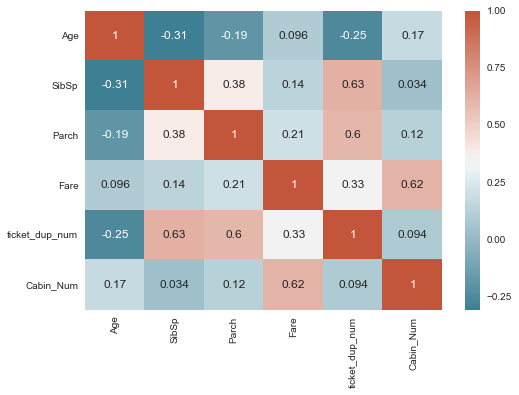

In [33]:
corr = train_numeric.corr()# plot the heatmap
sns.heatmap(corr, xticklabels=train_numeric.columns, yticklabels=train_numeric.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

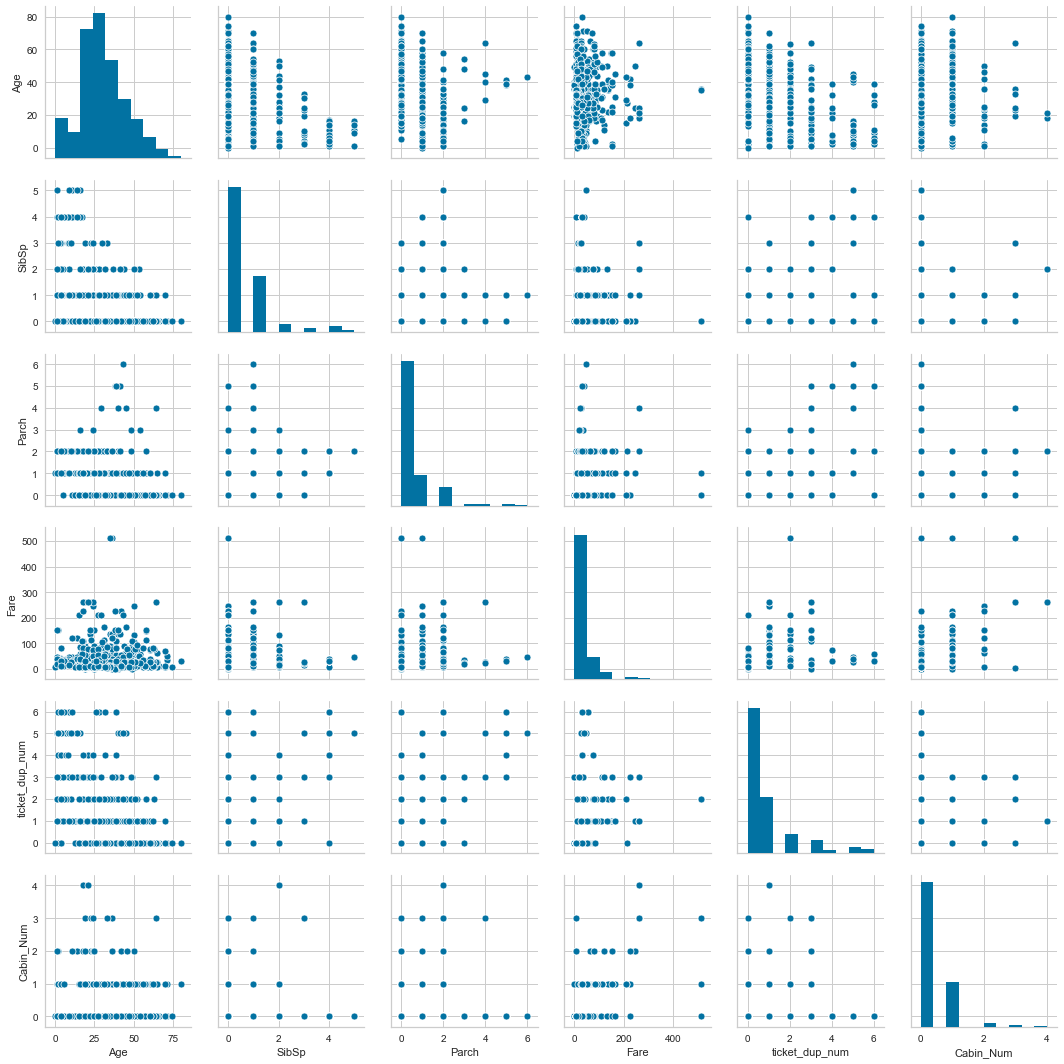

In [34]:
# scatter plot for pair numeric variables & histgram for numeric variables
sns.pairplot(train_numeric)

## Histogram for Category variables

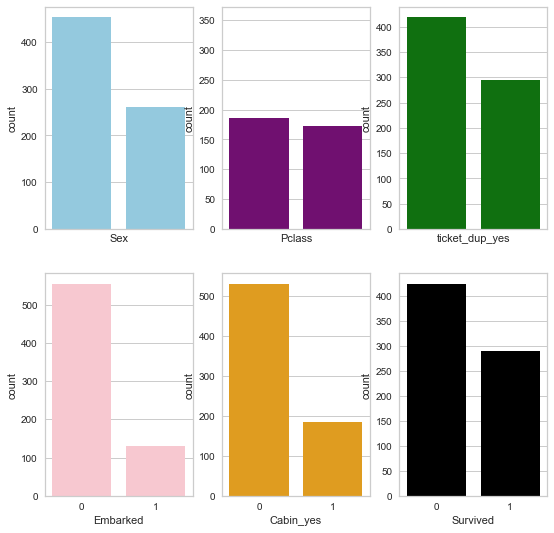

In [60]:
#Sex frequency plot
f, axes = plt.subplots(2, 3, figsize=(9, 9), sharex=True)
sns.countplot(train2["Sex"] , color="skyblue", label="Sex",ax=axes[0, 0])
sns.countplot(train2["Pclass"] , color="Purple", label="Pclass",ax=axes[0, 1])
sns.countplot(train2["ticket_dup_yes"] , color="Green", label="ticket_dup",ax=axes[0, 2])
sns.countplot(train2["Embarked"] , color="Pink", label="Embarked",ax=axes[1, 0])
sns.countplot(train2["Cabin_yes"] , color="orange", label="Cabin",ax=axes[1, 1])
sns.countplot(train2["Survived"] , color="black", label="Survived",ax=axes[1, 2])

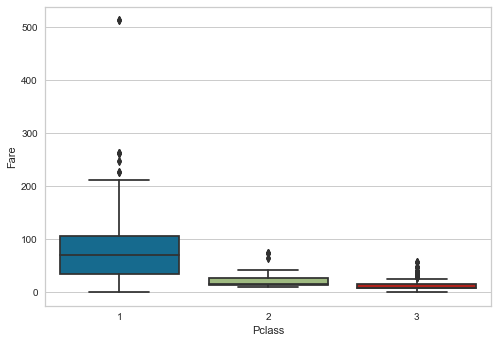

In [63]:
#better class may corresponding to higher fare, so the following boxplot is Fare v.s Pclass
sns.boxplot(train2["Pclass"] ,train2['Fare'])

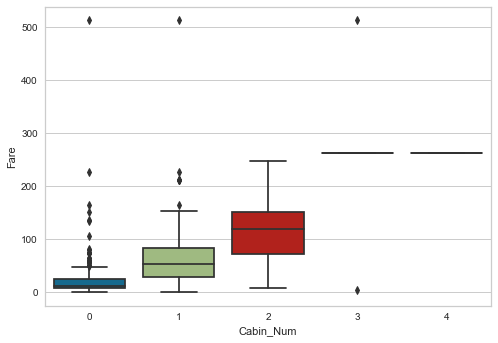

In [68]:
# more carbin may corresponding to higher fare, so the following boxplot is Fare v.s carbin_num
sns.boxplot(train2['Cabin_Num'],train2["Fare"])

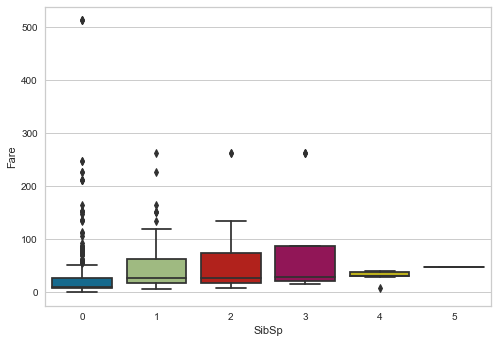

In [81]:
#more people may have higher fare
sns.boxplot(train2["SibSp"] ,train2["Fare"])

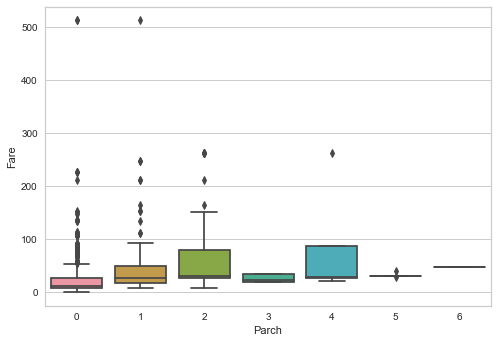

In [82]:
sns.boxplot(train2["Parch"] ,train2['Fare'])

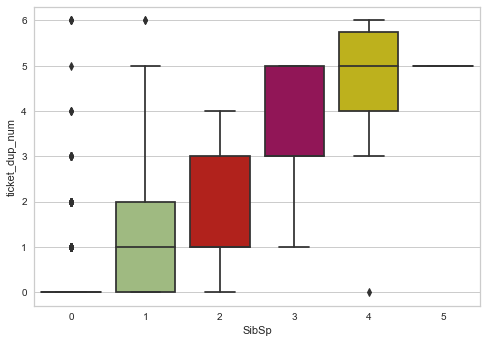

In [85]:
#more ppl also have positive correlation with ticket duplication
sns.boxplot(train2['SibSp'],train2['ticket_dup_num'])

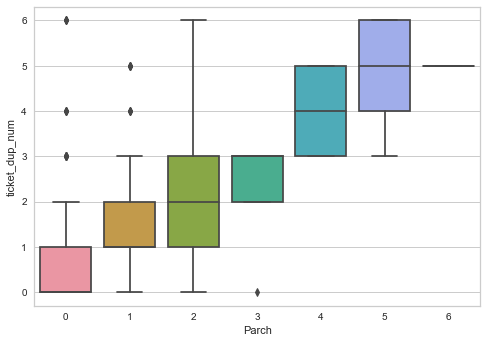

In [86]:
sns.boxplot(train2['Parch'],train2['ticket_dup_num'])

## Predictors v.s Response

In [94]:
train2.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,ticket_dup_yes,ticket_dup_num,Cabin_yes,Cabin_Num
0,1,0,3,male,22.0,1,0,7.2500,S,0,0,0.0,0
1,2,1,1,female,38.0,1,0,71.2833,C,0,0,1.0,1
2,3,1,3,female,26.0,0,0,7.9250,S,0,0,0.0,0
3,4,1,1,female,35.0,1,0,53.1000,S,1,1,1.0,1
4,5,0,3,male,35.0,0,0,8.0500,S,0,0,0.0,0


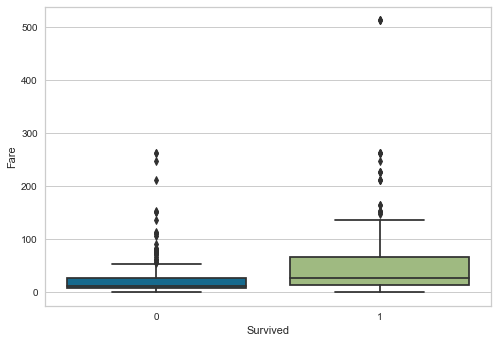

In [91]:
#higher fare seems have higher survived rate
sns.boxplot(train2['Survived'],train2['Fare'])

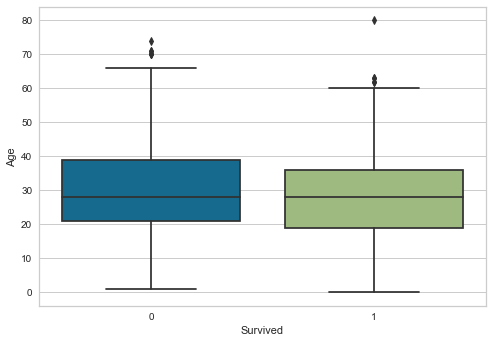

In [103]:
# Seems age won't determine the survived rate
sns.boxplot( train2['Survived'],train2['Age'])

In [25]:
# further investigation on Age, do t-test
from scipy import stats
survived_age=train[train['Survived']==1]['Age']
not_survived_age=train[train['Survived']==0]['Age']
print(stats.ttest_ind(survived_age,survived_age))
#the p-value significant larger than 0.05, the mean age between survived and non-survived ppl have no signigicant difference.
# Through the boxplot and t-test, also considering the amount of missing value in variable age, I decided to remove 'age'

Ttest_indResult(statistic=0.0, pvalue=1.0)


In [26]:
not_survived_age

0      22.0
4      35.0
5      54.0
6       2.0
11     20.0
12     39.0
13     14.0
15      2.0
16     31.0
17     35.0
21      8.0
23     19.0
24     40.0
25     66.0
26     28.0
27     42.0
28     21.0
29     18.0
31     40.0
32     27.0
35     18.0
36      7.0
37     21.0
40     65.0
42     28.0
44     11.0
45     22.0
47     45.0
48      4.0
50     19.0
       ... 
665    23.0
666    18.0
668    21.0
670    20.0
671    16.0
673    34.0
674    17.0
675    42.0
676    35.0
677    28.0
678     4.0
679    74.0
680     9.0
682    44.0
687    41.0
688    21.0
690    24.0
693    31.0
695    26.0
697    33.0
698    47.0
701    20.0
702    19.0
705    33.0
706    22.0
707    28.0
708    25.0
709    39.0
710    27.0
713    32.0
Name: Age, Length: 424, dtype: float64

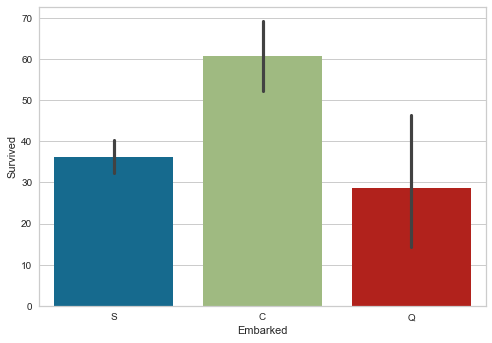

In [99]:
# the precentage of ppl survived in each different embarked location
sns.barplot(train2['Embarked'], train2['Survived'], estimator=lambda y: sum(y==1)*100.0/len(y))


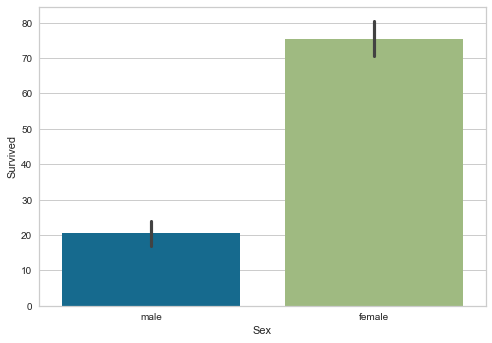

In [100]:
# the precentage of ppl survived in each different embarked location
sns.barplot(train2['Sex'], train2['Survived'], estimator=lambda y: sum(y==1)*100.0/len(y))

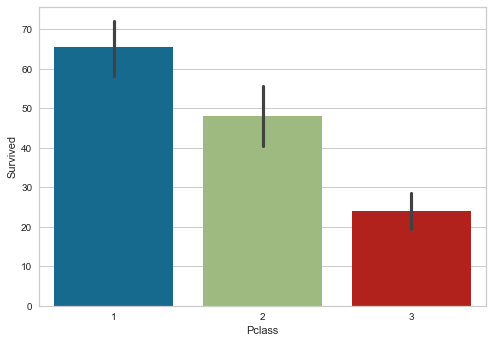

In [101]:
# the precentage of ppl survived in each different embarked location
sns.barplot(train2['Pclass'], train2['Survived'], estimator=lambda y: sum(y==1)*100.0/len(y))

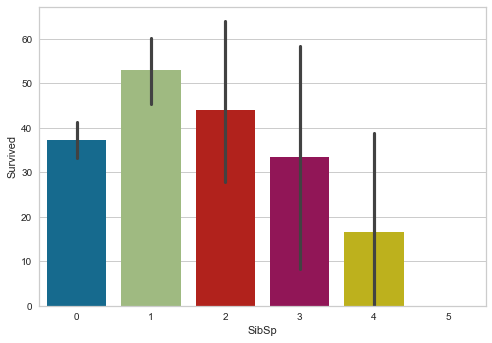

In [105]:
# the precentage of ppl survived in each different SibSp 
sns.barplot(train2['SibSp'], train2['Survived'], estimator=lambda y: sum(y==1)*100.0/len(y))

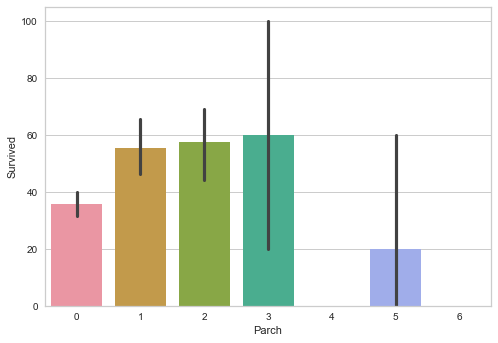

In [106]:
sns.barplot(train2['Parch'], train2['Survived'], estimator=lambda y: sum(y==1)*100.0/len(y))

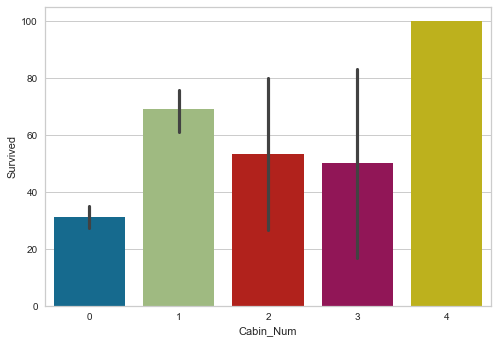

In [107]:
sns.barplot(train2['Cabin_Num'], train2['Survived'], estimator=lambda y: sum(y==1)*100.0/len(y))

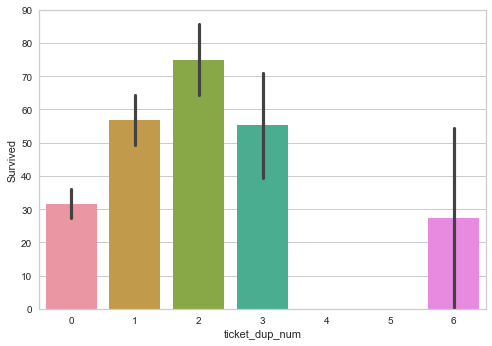

In [108]:
sns.barplot(train2['ticket_dup_num'], train2['Survived'], estimator=lambda y: sum(y==1)*100.0/len(y))

# Model

### since there are weak to moderate correlation between each variables, and there are some outliers in the dataset.  I decided to run tree, which can omit the effect caused by multicolinear and outliers by its natural 

### Since the columns age involve many missing values and, through the EDA (boxplot and t-test), the variable 'age' will not be used in model training

In [36]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier

In [32]:
train3=train_copy[['PassengerId','Survived','Pclass', 'Sex', 'SibSp',
       'Parch', 'Fare','Embarked', 'ticket_dup_yes',
       'ticket_dup_num', 'Cabin_yes', 'Cabin_Num']]
train3.loc[train3['Sex']=='male','Sex']=1
train3.loc[train3['Sex']=='female','Sex']=0
train3['Pclass']=train3['Pclass'].astype(object)
train3=pd.get_dummies(train3)

E:\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [34]:
X_train=train3.drop(['Survived','PassengerId'],axis=1)
y_train=train3[['Survived']]

In [37]:
# standardlize the dataset via MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)

In [38]:
state = 1  
val_size = 0.30  
  
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,  
    test_size=val_size, random_state=state)

In [39]:
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)
    gb_clf.fit(X_train, y_train)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(X_val, y_val)))

Learning rate:  0.05
Accuracy score (training): 0.774
Accuracy score (validation): 0.709
Learning rate:  0.075
Accuracy score (training): 0.803
Accuracy score (validation): 0.724
Learning rate:  0.1
Accuracy score (training): 0.801
Accuracy score (validation): 0.746
Learning rate:  0.25
Accuracy score (training): 0.814
Accuracy score (validation): 0.735
Learning rate:  0.5
Accuracy score (training): 0.830
Accuracy score (validation): 0.754
Learning rate:  0.75
Accuracy score (training): 0.838
Accuracy score (validation): 0.750
Learning rate:  1
Accuracy score (training): 0.836
Accuracy score (validation): 0.731


E:\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

# Model Accessing

## reshape the test data set to match the form of trainning data set

In [56]:
test=pd.read_csv(r"C:\Users\Tokey\Desktop\Titanic Competition\test.csv")
gender_submission=pd.read_csv(r"C:\Users\Tokey\Desktop\Titanic Competition\gender_submission.csv")
test=test.merge(gender_submission,left_on='PassengerId',right_on='PassengerId')

In [57]:
test=test[['PassengerId','Survived','Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked']]

In [58]:
test.describe()#lots of missing value in Age and 1 missing value in Fare

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [59]:

Ticket_counts_test=pd.DataFrame(test['Ticket'].value_counts())
ticket_dup_yes=[]
ticket_dup_num=[]
i=0
while i<len(test):
    if (Ticket_counts_test.loc[test.iloc[i,8]]>1).bool():
        ticket_dup_yes.append(1)
        ticket_dup_num.append(Ticket_counts_test.loc[test.iloc[i,8]][0])
    else:
        ticket_dup_yes.append(0)
        ticket_dup_num.append(1)
    i=i+1
ticket_dup_num=[x-1 for x in ticket_dup_num]
ticket_dup=pd.concat([pd.DataFrame(ticket_dup_yes,columns=['ticket_dup_yes']),pd.DataFrame(ticket_dup_num,columns=['ticket_dup_num'])],axis=1)
test=pd.concat([test,ticket_dup],axis=1)



In [60]:
# whether they have cabin
test['Cabin']=test['Cabin'].fillna(0)
test.loc[test['Cabin']!=0,'Cabin_yes']=1
test.loc[test['Cabin']==0,'Cabin_yes']=0

# how many cabin they have
test[['Cabin1','Cabin2','Cabin3','Cabin4']] = test['Cabin'].str.split(' ',expand=True)
test_Cabin_Num=test[['Cabin1','Cabin2','Cabin3','Cabin4']]
test_Cabin_Num=test_Cabin_Num.fillna(0)
test_Cabin_Num[test_Cabin_Num != 0] = 1 
test_Cabin_Num['Cabin_Num']=test_Cabin_Num['Cabin1']+test_Cabin_Num['Cabin2']+test_Cabin_Num['Cabin3']+test_Cabin_Num['Cabin4']
test=test.drop(['Cabin1','Cabin2','Cabin3','Cabin4'],axis=1)
test=pd.concat([test,test_Cabin_Num['Cabin_Num']],axis=1)

# convert from object to numeric data type
test['Cabin_Num']=test['Cabin_Num'].astype(int)


test=test[['PassengerId','Survived','Pclass', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare','Embarked', 'ticket_dup_yes',
       'ticket_dup_num', 'Cabin_yes', 'Cabin_Num']]

test=test.reset_index()

test=test.drop(['index','Age'],axis=1)

#quantify the category variables and get dummy variables
test.loc[test['Sex']=='male','Sex']=1
test.loc[test['Sex']=='female','Sex']=0
test['Pclass']=test['Pclass'].astype(object)
test=pd.get_dummies(test)


In [63]:
test=test.dropna() #914 is dropped

In [64]:
X_test=test.drop(['PassengerId','Survived'],axis=1)
y_test=test['Survived']

## Do gradient boost tree

In [93]:
gb_clf2 = GradientBoostingClassifier(n_estimators=20, learning_rate=0.5, max_features=2, max_depth=2, random_state=0)
gb_clf2.fit(X_train, y_train)
predictions = gb_clf2.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))

print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix:
[[249  16]
 [ 30 122]]
Classification Report
              precision    recall  f1-score   support

           0       0.89      0.94      0.92       265
           1       0.88      0.80      0.84       152

    accuracy                           0.89       417
   macro avg       0.89      0.87      0.88       417
weighted avg       0.89      0.89      0.89       417



E:\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [100]:
pd.DataFrame(predictions).to_csv(r"E:\FFOutput\titanic_result.csv")